In [ ]:
from glob import glob
import logging
import os
import pyglider.ncprocess as ncprocess
import pyglider.slocum as slocum
import pyglider.utils as pgutils
import xarray as xr


In [ ]:
# there were some bad profiles
bad = []
for fn in sorted(glob.glob("./delayed_rawnc/*.dbd.nc")):
    try:
        ds = xr.open_dataset(fn, decode_times=False)
        zeros = {d:n for d,n in ds.dims.items() if n == 0}
        if zeros:
            bad.append((fn, zeros))
        ds.close()
    except Exception as e:
        bad.append((fn, {"open_error": str(e)}))

print("Total:", len(glob.glob("./delayed_rawnc/*.dbd.nc")))
print("Bad :", len(bad))
for fn, why in bad[:30]:
    print(os.path.basename(fn), why)


/var/folders/1q/qmm9yg_90xl7f60v6q7wn2fr0000gn/T/ipykernel_83597/4198010676.py:8: FutureWarning: The return type of `Dataset.dims` will be changed to return a set of dimension names in future, in order to be more consistent with `DataArray.dims`. To access a mapping from dimension names to lengths, please use `Dataset.sizes`.
  zeros = {d:n for d,n in ds.dims.items() if n == 0}
<frozen _collections_abc>:883: FutureWarning: The return type of `Dataset.dims` will be changed to return a set of dimension names in future, in order to be more consistent with `DataArray.dims`. To access a mapping from dimension names to lengths, please use `Dataset.sizes`.
/var/folders/1q/qmm9yg_90xl7f60v6q7wn2fr0000gn/T/ipykernel_83597/4198010676.py:8: FutureWarning: The return type of `Dataset.dims` will be changed to return a set of dimension names in future, in order to be more consistent with `DataArray.dims`. To access a mapping from dimension names to lengths, please use `Dataset.sizes`.
  zeros = {d:n

Total: 720
Bad : 8
00670014.dbd.nc {'_ind': 0}
00670112.dbd.nc {'_ind': 0}
00700014.dbd.nc {'_ind': 0}
00700023.dbd.nc {'_ind': 0}
00700028.dbd.nc {'_ind': 0}
00700091.dbd.nc {'_ind': 0}
00700120.dbd.nc {'_ind': 0}
00700122.dbd.nc {'_ind': 0}


/var/folders/1q/qmm9yg_90xl7f60v6q7wn2fr0000gn/T/ipykernel_83597/4198010676.py:8: FutureWarning: The return type of `Dataset.dims` will be changed to return a set of dimension names in future, in order to be more consistent with `DataArray.dims`. To access a mapping from dimension names to lengths, please use `Dataset.sizes`.
  zeros = {d:n for d,n in ds.dims.items() if n == 0}
<frozen _collections_abc>:883: FutureWarning: The return type of `Dataset.dims` will be changed to return a set of dimension names in future, in order to be more consistent with `DataArray.dims`. To access a mapping from dimension names to lengths, please use `Dataset.sizes`.
/var/folders/1q/qmm9yg_90xl7f60v6q7wn2fr0000gn/T/ipykernel_83597/4198010676.py:8: FutureWarning: The return type of `Dataset.dims` will be changed to return a set of dimension names in future, in order to be more consistent with `DataArray.dims`. To access a mapping from dimension names to lengths, please use `Dataset.sizes`.
  zeros = {d:n

In [ ]:
bad = {
    "00670014.dbd.nc",
    "00670112.dbd.nc",
    "00700014.dbd.nc",
    "00700023.dbd.nc",
    "00700028.dbd.nc",
    "00700091.dbd.nc",
    "00700120.dbd.nc",
    "00700122.dbd.nc",
}

<xarray.Dataset> Size: 32MB
Dimensions:             (_ind: 394988)
Coordinates:
  * _ind                (_ind) float64 3MB 6.2e+11 6.3e+11 ... 7.4e+11 7.4e+11
Data variables:
    time                (_ind) float64 3MB dask.array<chunksize=(1,), meta=np.ndarray>
    c_wpt_lat           (_ind) float64 3MB dask.array<chunksize=(1,), meta=np.ndarray>
    c_wpt_lon           (_ind) float64 3MB dask.array<chunksize=(1,), meta=np.ndarray>
    m_heading           (_ind) float64 3MB dask.array<chunksize=(1,), meta=np.ndarray>
    m_lat               (_ind) float64 3MB dask.array<chunksize=(1,), meta=np.ndarray>
    m_lon               (_ind) float64 3MB dask.array<chunksize=(1,), meta=np.ndarray>
    m_pitch             (_ind) float64 3MB dask.array<chunksize=(1,), meta=np.ndarray>
    m_roll              (_ind) float64 3MB dask.array<chunksize=(1,), meta=np.ndarray>
    sci_m_present_time  (_ind) float64 3MB dask.array<chunksize=(1,), meta=np.ndarray>
Attributes: (12/18)
    num_ascii_tags:         14
    activeSensorList:       {'name': 'cc_behavior_state', 'unit': 'enum', 'bi...
    dbd_label:              DBD(dinkum_binary_data)file
    encoding_ver:           5
    all_sensors:            F
    the8x3_filename:        00620000
    ...                     ...
    state_bytes_per_cycle:  435
    sensor_list_crc:        df2b0919
    sensor_list_factored:   1
    _dbdfiletimestamp:      1768578511.2476115
    _processing:            pyglider.slocum python library
    Conventions:            None

In [ ]:
# set up directories and file names

binarydir = './delayed_raw/'
rawdir = './delayed_rawnc/'
cacdir = './cac/'
sensorlist = './unit1230_sensors.txt'
deploymentyaml = './deployment.yml'
l1tsdir = './L0-timeseries/'
profiledir = './L0-profiles/'
griddir = './L0-gridfiles/'
scisuffix = 'ebd'
glidersuffix = 'dbd'

In [ ]:
# convert binary to raw netcdf
slocum.binary_to_rawnc(
    binarydir, rawdir, cacdir, sensorlist, deploymentyaml,
    incremental=True, scisuffix=scisuffix, glidersuffix=glidersuffix)

In [ ]:
#merge raw netcdf files
slocum.merge_rawnc(rawdir, rawdir, deploymentyaml,
                   scisuffix=scisuffix, glidersuffix=glidersuffix)

In [ ]:
# create a timeseries from raw files
outname = slocum.raw_to_timeseries(
    rawdir, l1tsdir, deploymentyaml,
    profile_filt_time=100, profile_min_time=300)

In [ ]:
# extract timeseries profiles 
ncprocess.extract_timeseries_profiles(outname, profiledir, deploymentyaml)

KeyError: "No variable named 'potential_density'. Variables on the dataset include ['profile_time_start', 'profile_time_end', 'heading', 'pitch', 'roll', ..., 'depth', 'profile', 'time', 'longitude', 'latitude']"

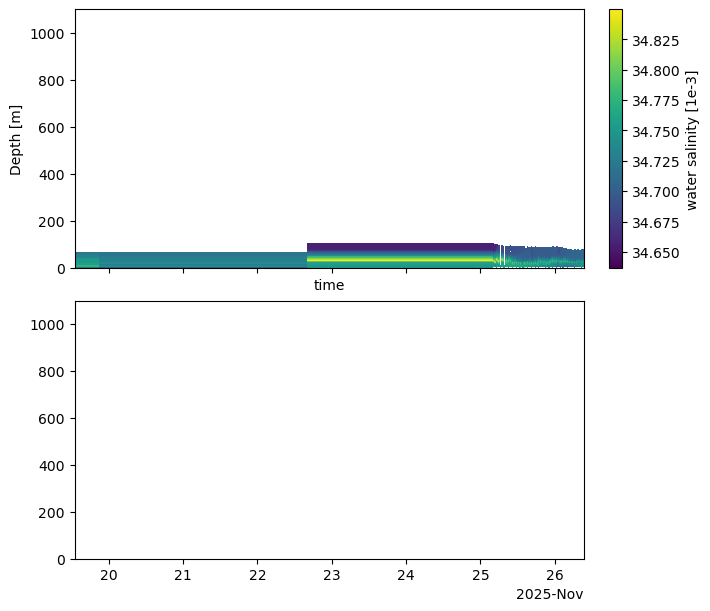

In [ ]:
# make gridfiles from profiles
outname2 = ncprocess.make_gridfiles(outname, griddir, deploymentyaml)

# example grid plot
# pgutils.example_gridplot(outname2, './gridplot2.png', ylim=[150, 0],
#                          toplot=['salinity','par',
#                                  ])
# example plot not working because expects potential density as a variable in the gridfile